In [20]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
from synkit.IO import rsmi_to_its, rsmi_to_graph
from wp1_functions import save_subsets_as_tsv, split_all_data_into_subsets
from chem_graph_handling import visualize_graph


In [21]:
dataset = "schneider50k_clean.tsv"
data = pd.read_csv(dataset, sep="\t")  # Tab-separierte Datei einlesen
print("Datenvorschau:")
print(data.head())


Datenvorschau:
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                        original_rxn rxn_class      source  \
0  [CH3:17][S:14](=[O:15])(=[O:16])[N:11]1[CH2:10...     6.1.5  US06887874   
1  O.O.[Na+].[CH3:1][c:2]1[cH:7][c:6]([N+:8](=O)[...     7.1.1  US07056926   
2  [CH3:1][O:2][c:3]1[cH:4][cH:5][c:6](-[c:9]2[cH...     1.8.5  US08492378   
3  Cl.[CH3:43][CH2:42][S:44](=[O:45])(=[O:46])Cl....     2.2.3  US08592454   
4  [CH3:25][O:24][c:21]1[cH:22][cH:23][c:17]([O:1...     1.3.7  US06716851   

                                           clean_rxn  
0  [CH3:17][S:14](=[O:15])(=[O:16])[N:11]1[CH2:10...  
1  [CH3:1][c:2]1[cH:7][c:6]([N+:8](=O)[O-])[cH:5]...  
2  [CH3:1][O:2][c:3]1[cH:4][cH:5][c:6](-[c:9]2[cH...  
3  [CH3:43][CH2:42][S:44](=[O:45])(=[O:46])Cl.[CH...  
4  [CH3:25][O:24][c:21]1[cH:22][cH:23][c:17]([O:1...  

In [22]:
print("\nAnalyse der Reaktionsklassen:")
class_counts = data["rxn_class"].value_counts()
print(f"Anzahl der Klassen: {len(class_counts)}")
print("Beispiele pro Klasse:")
print(class_counts)


Analyse der Reaktionsklassen:
Anzahl der Klassen: 50
Beispiele pro Klasse:
rxn_class
6.1.5     1000
7.1.1     1000
1.8.5     1000
2.2.3     1000
1.3.7     1000
1.7.9     1000
6.2.2     1000
2.7.2     1000
2.6.1     1000
1.6.8     1000
3.1.1     1000
1.6.2     1000
1.2.1     1000
1.6.4     1000
1.2.5     1000
2.3.1     1000
5.1.1     1000
10.1.1    1000
2.1.1     1000
2.6.3     1000
6.2.1     1000
10.2.1    1000
1.2.4     1000
2.1.2     1000
6.3.7     1000
6.1.1     1000
9.3.1     1000
1.3.8     1000
1.3.6     1000
3.1.5     1000
6.2.3     1000
3.4.1     1000
6.1.3     1000
1.7.6     1000
10.1.2    1000
9.1.6     1000
10.1.5    1000
3.3.1     1000
10.4.2    1000
6.3.1     1000
1.7.7     1000
7.9.2     1000
8.1.5     1000
1.7.4     1000
7.2.1     1000
8.1.4     1000
8.2.1     1000
7.3.1     1000
2.1.7     1000
3.1.6     1000
Name: count, dtype: int64


TODO: 

- ~~varied random subsets of 3-5 classes with each 20-200 representatives~~
- build up functions to print and/or plot reactions for manual tests later on


In [23]:
results = split_all_data_into_subsets(
    data,
    label_col="rxn_class", 
    min_classes=5,
    max_classes=5,
    min_n=200,
    max_n=20,
    seed=42,            
)

# Kurze Übersicht
for i, (_, labels, counts) in enumerate(results, start=1):
    print(f"Subset {i}: Klassen={labels}, Counts={counts}")

# Abspeichern
paths = save_subsets_as_tsv(results, out_dir="subsets_big", prefix="subset")
print("Gespeichert:", [str(p) for p in paths])

Subset 1: Klassen=['1.2.4', '1.7.4', '2.1.2', '6.2.1', '6.3.1'], Counts={'6.2.1': 200, '1.2.4': 200, '1.7.4': 200, '2.1.2': 200, '6.3.1': 200}
Subset 2: Klassen=['1.2.4', '1.7.6', '1.7.7', '10.2.1', '2.2.3'], Counts={'1.7.7': 200, '10.2.1': 200, '1.2.4': 200, '2.2.3': 200, '1.7.6': 200}
Subset 3: Klassen=['10.1.2', '2.1.1', '2.7.2', '6.1.1', '7.3.1'], Counts={'2.1.1': 200, '10.1.2': 200, '7.3.1': 200, '2.7.2': 200, '6.1.1': 200}
Subset 4: Klassen=['2.3.1', '2.6.1', '3.1.5', '6.3.7', '9.3.1'], Counts={'3.1.5': 200, '9.3.1': 200, '2.3.1': 200, '6.3.7': 200, '2.6.1': 200}
Subset 5: Klassen=['1.2.1', '1.7.9', '3.1.5', '3.4.1', '9.3.1'], Counts={'9.3.1': 200, '3.1.5': 200, '1.7.9': 200, '1.2.1': 200, '3.4.1': 200}
Subset 6: Klassen=['1.6.8', '1.7.6', '10.1.2', '6.2.3', '8.1.4'], Counts={'1.7.6': 200, '10.1.2': 200, '6.2.3': 200, '8.1.4': 200, '1.6.8': 200}
Subset 7: Klassen=['1.2.4', '3.1.6', '7.1.1', '7.9.2', '9.3.1'], Counts={'7.9.2': 200, '7.1.1': 200, '1.2.4': 200, '3.1.6': 200, '9.3.1'

Eductgraph
25 {'element': 'C', 'aromatic': False, 'hcount': 3, 'charge': 0, 'neighbors': ['O'], 'atom_map': 25}
24 {'element': 'O', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C'], 'atom_map': 24}
21 {'element': 'C', 'aromatic': True, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C', 'O'], 'atom_map': 21}
22 {'element': 'C', 'aromatic': True, 'hcount': 1, 'charge': 0, 'neighbors': ['C', 'C'], 'atom_map': 22}
23 {'element': 'C', 'aromatic': True, 'hcount': 1, 'charge': 0, 'neighbors': ['C', 'C'], 'atom_map': 23}
17 {'element': 'C', 'aromatic': True, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C', 'O'], 'atom_map': 17}
16 {'element': 'O', 'aromatic': False, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C'], 'atom_map': 16}
15 {'element': 'C', 'aromatic': False, 'hcount': 3, 'charge': 0, 'neighbors': ['O'], 'atom_map': 15}
18 {'element': 'C', 'aromatic': True, 'hcount': 0, 'charge': 0, 'neighbors': ['C', 'C', 'N'], 'atom_map': 18}
19 {'element': 'N', 'aromatic': Fal

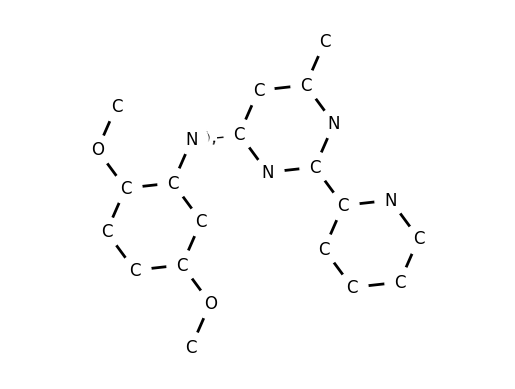

In [24]:
rmsi = data["clean_rxn"].iloc[4]
visualize_graph(rmsi)